In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### 1. Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df['hypertension']=df['hypertension'].astype('object')
df['heart_disease']=df['heart_disease'].astype('object')
df['stroke']=df['stroke'].astype('object')

#### 2. Check the shape/dimension of the dataset

In [7]:
df.shape

(5110, 12)

#### 3. Check for the missing values.Display number of missing values per column.

In [8]:
df.isnull().sum() #only BMI has null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### 4. Investigate and predict the missing BMI Value.

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
k = imputer.fit_transform(df[['bmi']])
df['bmi'] = pd.DataFrame(k)

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


#### 6. Check the descriptive statistics of the dataset.

In [12]:
df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.698018
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.800000
50%,36932.000000,45.000000,91.885000,28.400000
75%,54682.000000,61.000000,114.090000,32.800000
max,72940.000000,82.000000,271.740000,97.600000


#### 7. Visualize the proportion of Stroke samples in the dataset.

<Axes: xlabel='stroke'>

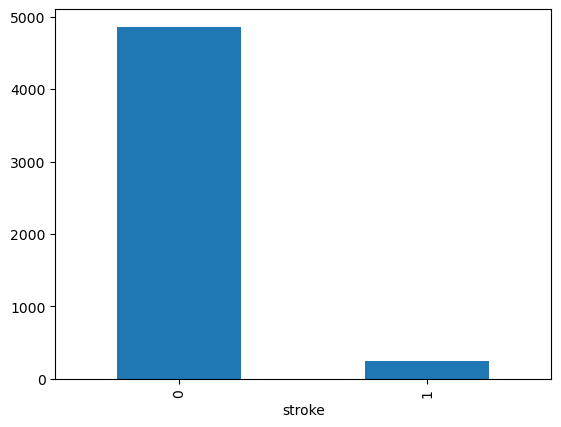

In [13]:
df['stroke'].value_counts().plot(kind = 'bar') #highly imbalanced

#### 8. Visualize the Distribution of Male and Female Ages. Write the Observation

<Axes: xlabel='gender'>

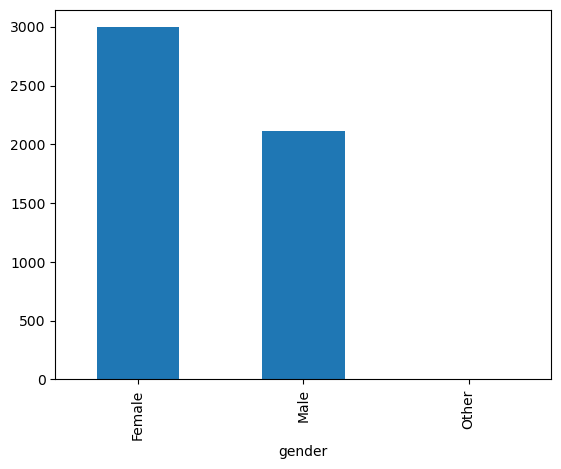

In [14]:
df['gender'].value_counts().plot(kind = 'bar') #we shall remove the other gender record since there is only one record to it

In [15]:
df[df['gender'] == 'Other'].index

Index([3116], dtype='int64')

In [16]:
df.drop(3116,axis = 0,inplace = True)

<Axes: xlabel='gender'>

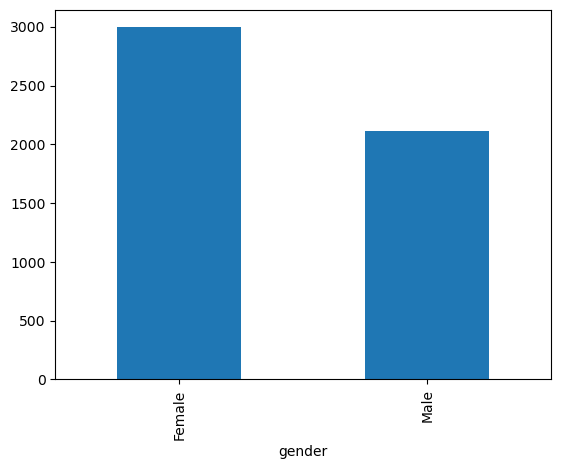

In [17]:
df['gender'].value_counts().plot(kind ='bar') #number of females are higher than male and this variable has good balance between
#the classes

#### 10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age

<Axes: xlabel='stroke'>

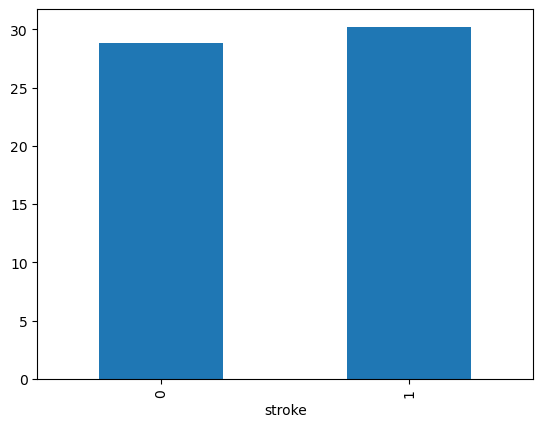

In [18]:
df.groupby('stroke')['bmi'].mean().plot(kind = 'bar')

<Axes: xlabel='stroke'>

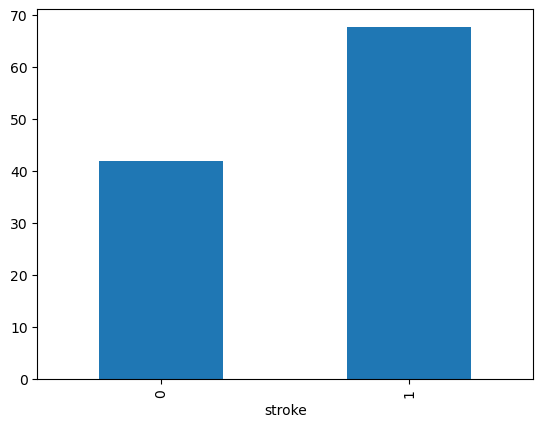

In [19]:
df.groupby('stroke')['age'].mean().plot(kind = 'bar')

#### 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population

<Axes: ylabel='count'>

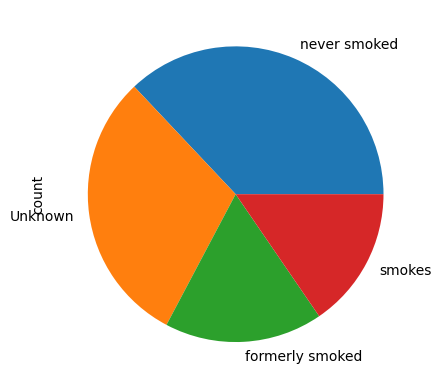

In [20]:
df['smoking_status'].value_counts().plot(kind = 'pie')

#### 12. Perform hypothesis testing to find the significant variables

In [21]:
df.head() #let us see some stats test for some variables

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### Hypothesis for all variables
#### h0 - Independent variable and target variable stroke are independent
#### h1 - Independent variable and target variable stroke are dependent

In [22]:
from scipy import stats

In [23]:
stats.chi2_contingency(pd.crosstab(df['gender'],df['stroke']))

Chi2ContingencyResult(statistic=0.340002536046177, pvalue=0.5598277580669416, dof=1, expected_freq=array([[2848.07985907,  145.92014093],
       [2011.92014093,  103.07985907]]))

In [24]:
stats.chi2_contingency(pd.crosstab(df['hypertension'],df['stroke']))

Chi2ContingencyResult(statistic=81.57314462043591, pvalue=1.688936253410575e-19, dof=1, expected_freq=array([[4386.27128597,  224.72871403],
       [ 473.72871403,   24.27128597]]))

In [25]:
stats.chi2_contingency(pd.crosstab(df['heart_disease'],df['stroke']))

Chi2ContingencyResult(statistic=90.22943664078221, pvalue=2.120831133146208e-21, dof=1, expected_freq=array([[4597.45155608,  235.54844392],
       [ 262.54844392,   13.45155608]]))

In [26]:
stats.chi2_contingency(pd.crosstab(df['ever_married'],df['stroke']))

Chi2ContingencyResult(statistic=58.86780922483486, pvalue=1.6862856191673454e-14, dof=1, expected_freq=array([[1670.41691133,   85.58308867],
       [3189.58308867,  163.41691133]]))

In [27]:
stats.chi2_contingency(pd.crosstab(df['work_type'],df['stroke']))

Chi2ContingencyResult(statistic=49.1591485868476, pvalue=5.40903546949726e-10, dof=4, expected_freq=array([[6.24979448e+02, 3.20205520e+01],
       [2.09277745e+01, 1.07222548e+00],
       [2.78149149e+03, 1.42508514e+02],
       [7.79083969e+02, 3.99160305e+01],
       [6.53517322e+02, 3.34826776e+01]]))

In [28]:
stats.chi2_contingency(pd.crosstab(df['Residence_type'],df['stroke']))

Chi2ContingencyResult(statistic=1.0749713079092142, pvalue=0.29982523877153633, dof=1, expected_freq=array([[2390.52260716,  122.47739284],
       [2469.47739284,  126.52260716]]))

In [29]:
stats.chi2_contingency(pd.crosstab(df['smoking_status'],df['stroke']))

Chi2ContingencyResult(statistic=29.22572707549827, pvalue=2.0077041756108317e-06, dof=3, expected_freq=array([[1468.749266  ,   75.250734  ],
       [ 840.91603053,   43.08396947],
       [1799.78860834,   92.21139166],
       [ 750.54609513,   38.45390487]]))

all the variables have p values less than significance value which is 0.05 except gender. So we fail to reject the null variables for gender for others we reject the null hypothesis so except gender all the other variables are dependent to stroke

#### 13. Drop the unnecessary columns.

#### lets drop the id variable since it does not add any value to analysis and model building

In [30]:
df.drop('id',axis = 1,inplace = True)

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### 14. Write the code to replace following categories columns in integer format as follow –
* a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
* b) ever_married('Yes': 1, 'No': 0)
* c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [32]:
df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2},inplace = True)

In [33]:
df['ever_married'].replace({'Yes': 1, 'No': 0},inplace = True)

In [34]:
df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1},inplace = True)

#### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

C:\Users\USER\AppData\Local\Temp\ipykernel_11060\871913598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi']) #data is rightly skewed indicates the presence of outliers


<Axes: xlabel='bmi', ylabel='Density'>

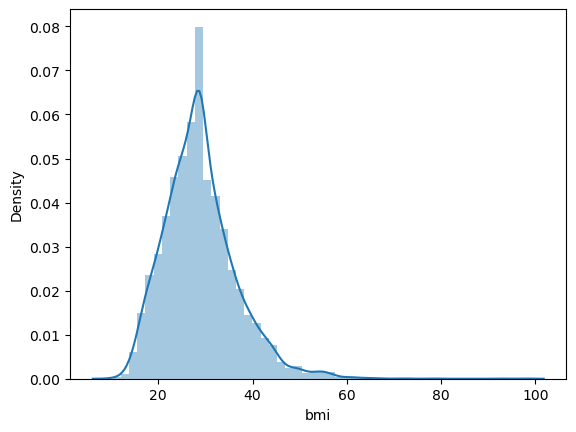

In [35]:
sns.distplot(df['bmi']) #data is rightly skewed indicates the presence of outliers

In [36]:
#stroke variables distribution has already been done in previous questions

#### 16. List down columns that are highly skewed.
#### 17. List down the columns that are highly kurtosis

In [37]:
df['ever_married']=df['ever_married'].astype('object')

In [38]:
df['work_type']=df['work_type'].astype('object')

In [39]:
df['smoking_status']=df['smoking_status'].astype('object')

In [40]:
cat = df.select_dtypes(exclude = np.number).columns.to_list()
num = df.select_dtypes(include = np.number).columns.to_list()

C:\Users\USER\AppData\Local\Temp\ipykernel_11060\59131759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


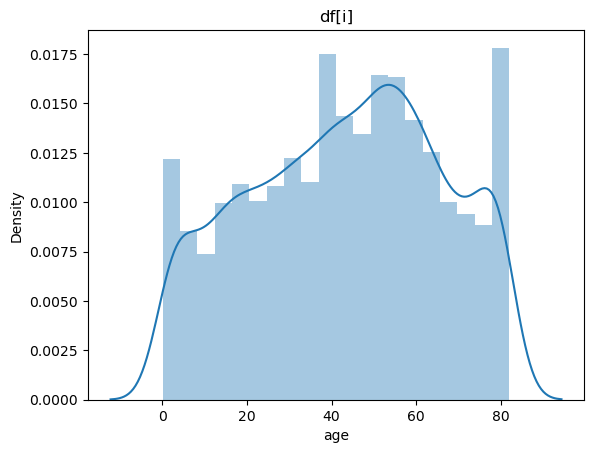

C:\Users\USER\AppData\Local\Temp\ipykernel_11060\59131759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


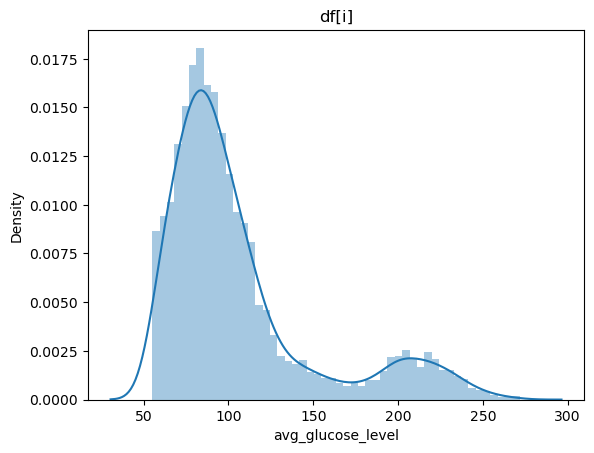

C:\Users\USER\AppData\Local\Temp\ipykernel_11060\59131759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],kde=True)


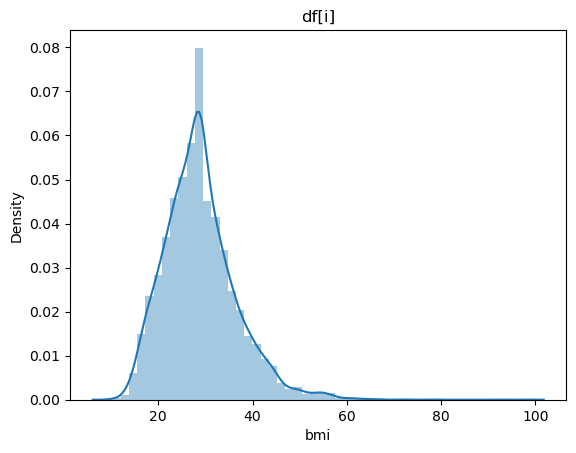

<Figure size 640x480 with 0 Axes>

In [41]:
for i in num:
    sns.distplot(df[i],kde=True)
    plt.title('df[i]')
    plt.show()

plt.tight_layout()

#### bmi and average glucose levels are highly skewed and have high kurtosis

#### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

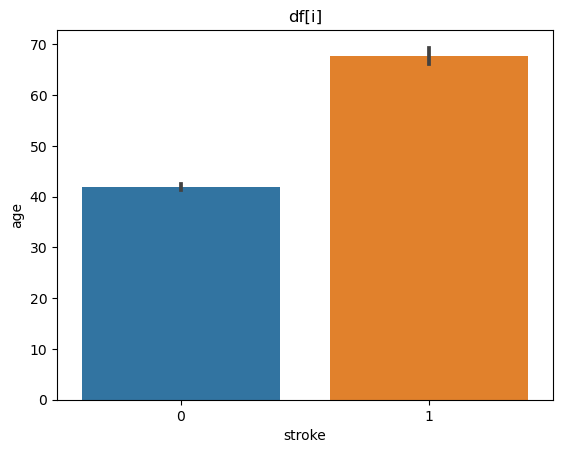

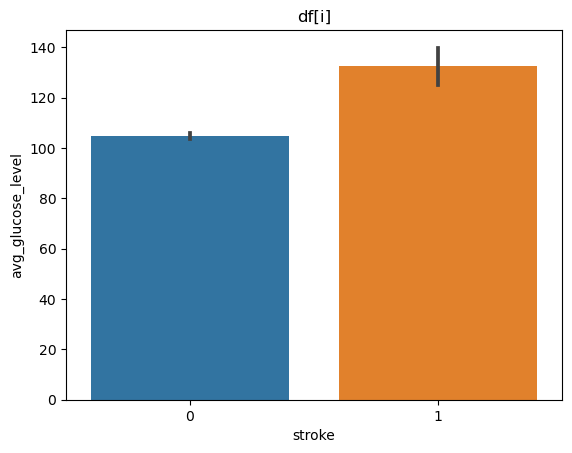

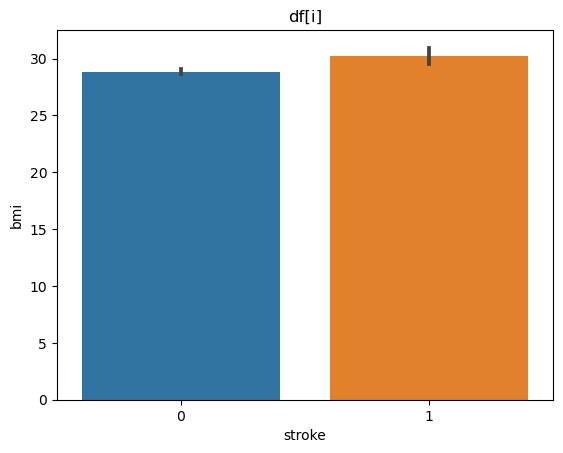

<Figure size 640x480 with 0 Axes>

In [42]:
for i in num:
    sns.barplot(y=df[i],x = df['stroke'])
    plt.title('df[i]')
    plt.show()

plt.tight_layout() #for all three numerical variabes the average value is higher for people who have stroke

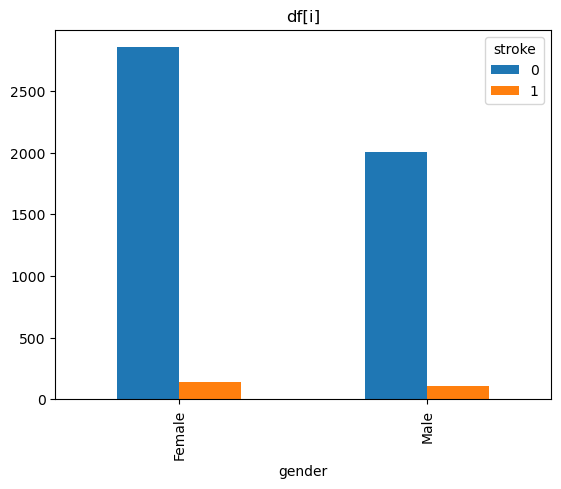

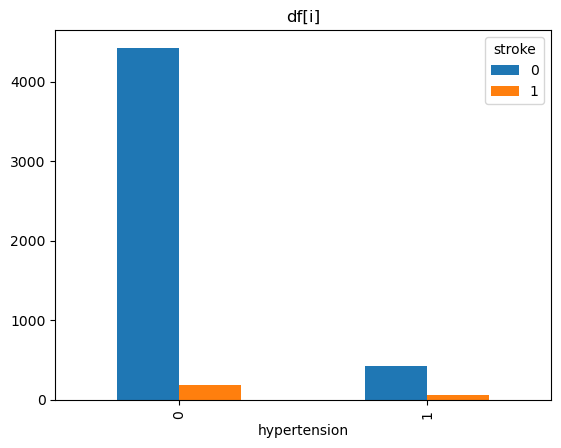

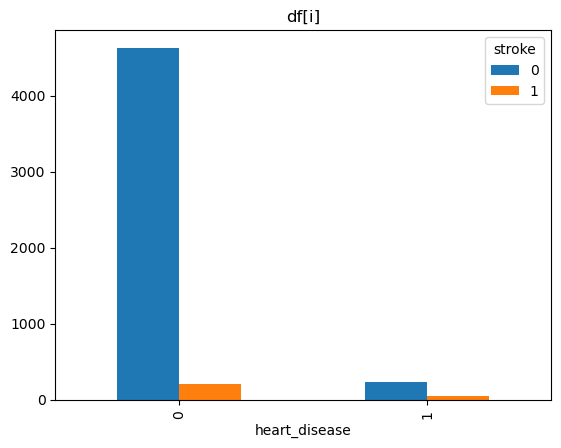

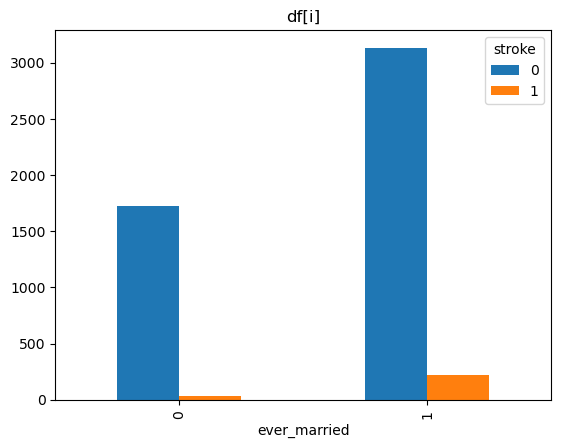

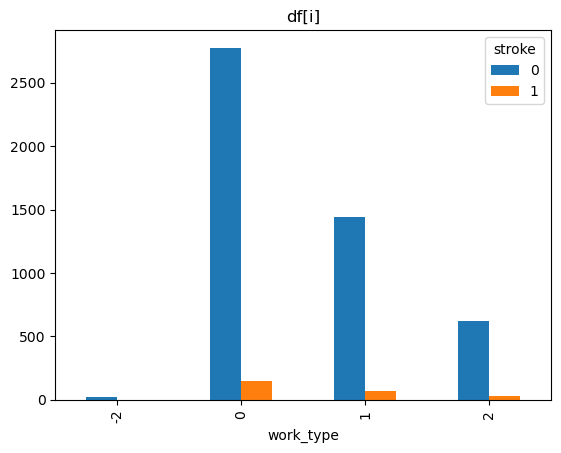

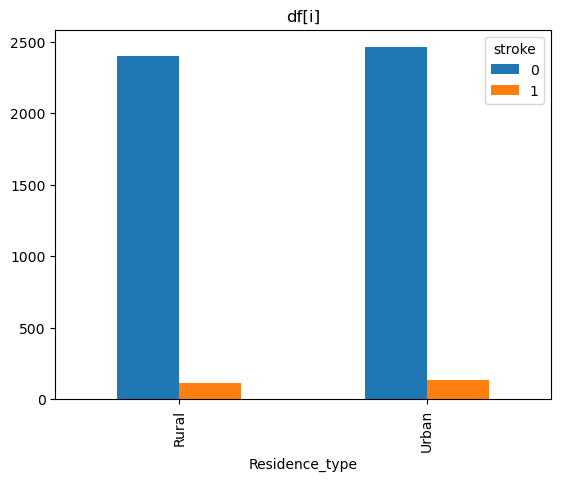

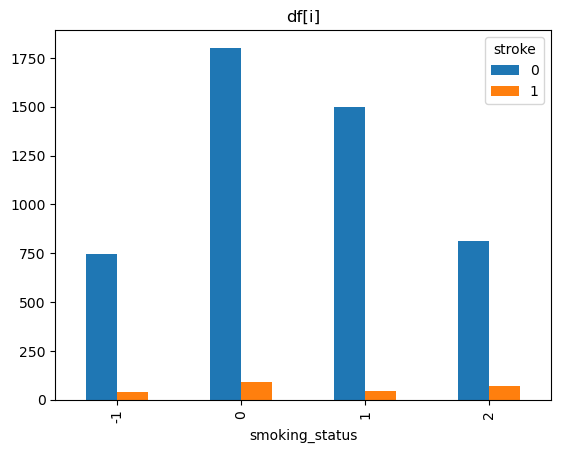

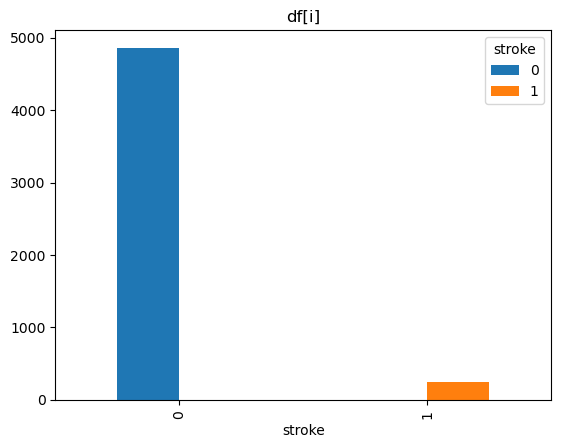

<Figure size 640x480 with 0 Axes>

In [43]:
for i in cat:
    pd.crosstab(df[i],df['stroke']).plot(kind = 'bar')
    plt.title('df[i]')
    plt.show()

plt.tight_layout()

* Out of all the variables in the above graphs since there is a high imbalance in the stroke variable that has affected the analysis of these variables
* out of the people who get stroke people who are married,work type and smoking status 0 are high in number the residence type does not seem to have much effect on as it is equal for both stroke and non stroke people

#### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation,consider 0.7 to 1 as high)

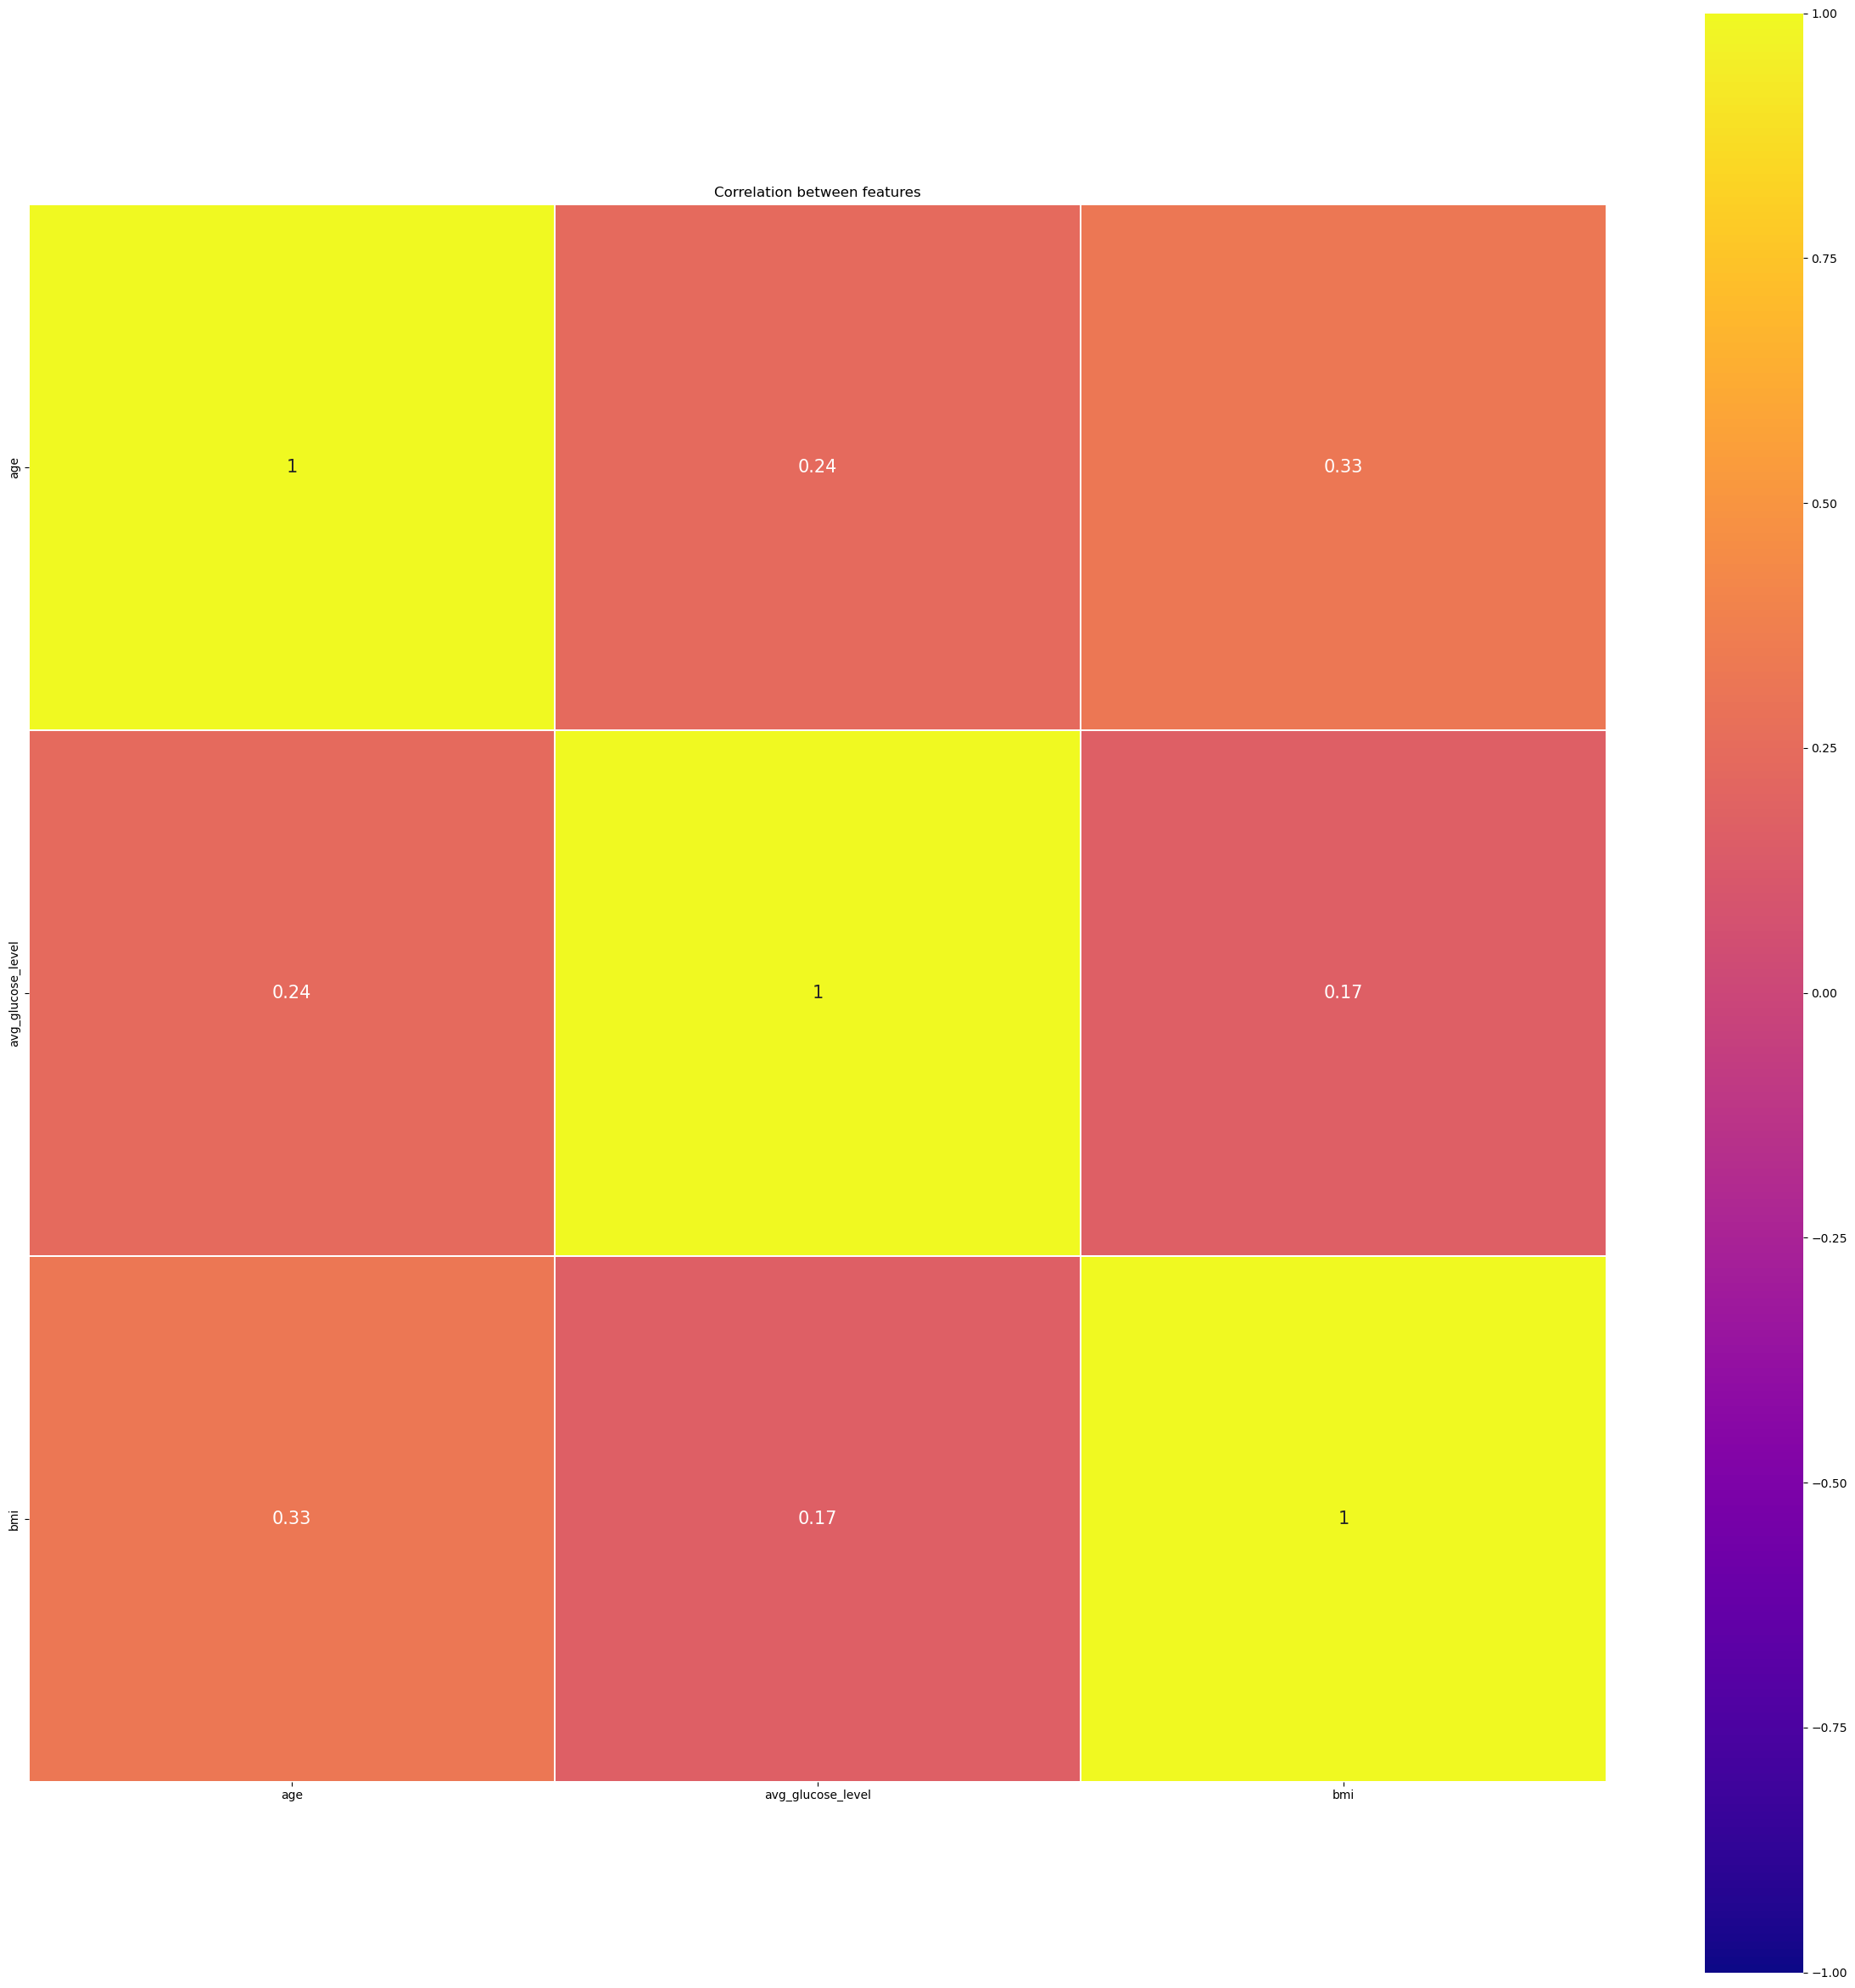

In [44]:
plt.figure(figsize=(30, 30))


sns.heatmap(df[num].corr(),
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

In [45]:
#there is not much correlation between the variables 

#### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
#### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.
#### 22. Model Selection/hyperparameter tuning- Try different models and fine tune their performance until you get the desired level of
#### performance on the given dataset.Model Evaluation- Evaluate the models using appropriate evaluation metrics.

In [46]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,Urban,228.69,36.600000,2,1
1,Female,61.0,0,0,1,1,Rural,202.21,28.893237,0,1
2,Male,80.0,0,1,1,0,Rural,105.92,32.500000,0,1
3,Female,49.0,0,0,1,0,Urban,171.23,34.400000,-1,1
4,Female,79.0,1,0,1,1,Rural,174.12,24.000000,0,1


In [47]:
dummy = pd.get_dummies(df['gender'])

In [48]:
dummy_r = pd.get_dummies(df['Residence_type'])

In [49]:
dummy = dummy.astype('int')

In [50]:
dummy_r = dummy_r.astype('int')

In [51]:
df = pd.concat([df,dummy],axis = 1)

In [52]:
df = pd.concat([df,dummy_r],axis = 1)

In [53]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,Male,67.0,0,1,1,0,Urban,228.69,36.600000,2,1,0,1,0,1
1,Female,61.0,0,0,1,1,Rural,202.21,28.893237,0,1,1,0,1,0
2,Male,80.0,0,1,1,0,Rural,105.92,32.500000,0,1,0,1,1,0
3,Female,49.0,0,0,1,0,Urban,171.23,34.400000,-1,1,1,0,0,1
4,Female,79.0,1,0,1,1,Rural,174.12,24.000000,0,1,1,0,1,0


In [54]:
df['hypertension']=df['hypertension'].astype('int')
df['heart_disease']=df['heart_disease'].astype('int')
df['ever_married']=df['ever_married'].astype('int')
df['work_type']=df['work_type'].astype('int')
df['stroke']=df['stroke'].astype('int')

In [55]:
x = df.drop(['stroke','gender','Residence_type'],axis = 1)
y = df['stroke']

In [56]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state = 100)

In [57]:
dt_base = DecisionTreeClassifier()
model_base = dt_base.fit(xtrain,ytrain)
ypred_base = model_base.predict(xtest)
print(classification_report(ytest,ypred_base))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1463
           1       0.14      0.16      0.15        70

    accuracy                           0.92      1533
   macro avg       0.55      0.56      0.55      1533
weighted avg       0.92      0.92      0.92      1533



In [58]:
pip install imblearn

In [59]:
rf_base = RandomForestClassifier()
model_rf_base = rf_base.fit(xtrain,ytrain)
ypred_rf_base = model_rf_base.predict(xtest)
print(classification_report(ytest,ypred_rf_base))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1463
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [60]:
ad_base = AdaBoostClassifier()
model_ad_base = ad_base.fit(xtrain,ytrain)
ypred_ad_base = model_ad_base.predict(xtest)
print(classification_report(ytest,ypred_ad_base))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1463
           1       0.17      0.01      0.03        70

    accuracy                           0.95      1533
   macro avg       0.56      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [61]:
kn_base = KNeighborsClassifier()
model_kn_base = kn_base.fit(xtrain,ytrain)
ypred_kn_base = model_kn_base.predict(xtest)
print(classification_report(ytest,ypred_kn_base))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1463
           1       0.17      0.03      0.05        70

    accuracy                           0.95      1533
   macro avg       0.56      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [62]:
dt_base = DecisionTreeClassifier()
model_base = dt_base.fit(xtrain,ytrain)
ypred_base = model_base.predict(xtest)
print(classification_report(ytest,ypred_base))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1463
           1       0.16      0.19      0.17        70

    accuracy                           0.92      1533
   macro avg       0.56      0.57      0.56      1533
weighted avg       0.92      0.92      0.92      1533



In [63]:
fea_imp = pd.DataFrame({'Columns':xtrain.columns,'Importance':dt_base.feature_importances_})

In [64]:
fea_imp.sort_values(by = 'Importance',ascending = False)

,Columns,Importance
5,avg_glucose_level,0.316066
6,bmi,0.260684
0,age,0.202155
7,smoking_status,0.050107
1,hypertension,0.037619
4,work_type,0.033981
3,ever_married,0.020726
8,Female,0.020521
10,Rural,0.020025
9,Male,0.014677


In [65]:
imp = ['avg_glucose_level','bmi','age']

In [66]:
xtrain_imp = xtrain.loc[:,imp]
xtest_imp = xtest.loc[:,imp]

In [67]:
dt_imp = DecisionTreeClassifier()
model_imp = dt_imp.fit(xtrain_imp,ytrain)
ypred_imp = model_imp.predict(xtest_imp)
print(classification_report(ytest,ypred_imp))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1463
           1       0.20      0.29      0.23        70

    accuracy                           0.91      1533
   macro avg       0.58      0.62      0.59      1533
weighted avg       0.93      0.91      0.92      1533



In [68]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0)
params=({'criterion':['gini','entropy'],'max_depth':[5,6,7]})
grid=GridSearchCV(dt,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [69]:
dt_gv = DecisionTreeClassifier(criterion = 'gini',max_depth=7)
model_gv = dt_gv.fit(xtrain,ytrain)
ypred_gv = model_gv.predict(xtest)
print(classification_report(ytest,ypred_gv))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1463
           1       0.18      0.04      0.07        70

    accuracy                           0.95      1533
   macro avg       0.57      0.52      0.52      1533
weighted avg       0.92      0.95      0.93      1533



In [70]:
import pickle

In [74]:
filename = 'trained_model.sav'
pickle.dump(dt_imp,open(filename,'wb'))

In [75]:
loaded_model = pickle.load(open('trained_model.sav','rb'))